## **1-Project One**

#### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

#### **Question**

We have a dataset, and we are asked to prepare this data for ML model. We have to convert values to number and then standardize the numbers.

In [ ]:
data = pd.read_csv('data1.csv')
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


Just because this data is going to be used for ML model, we have to separate target and features.

In [ ]:
X = data.iloc[:, :-1].values #All columns except the last one
y = data.iloc[:, -1].values #Only the last column
X

#### **Handle Null Values**

If we look at data, we see we have some `null` values. In this step, there are many different methods, but here we use one of them which is called `SimpleImputer`. In this method, if the algorithm finds a null value, put the average for that column instead of the nul value. So, this method is only applicable for numerical columns.

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = 'mean')
si.fit(X[:, 1:]) #We should only include numerical columns
X[:, 1:] = si.transform(X[:, 1:])
X

#### **Convert Categorical to Numerical**

First, we should change all text to lable (number). For doing this, we use `Lable Encoding` method.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0]) #We only include categorical column
X

Now, just because the categories in this column (or text) does not have any priority to each other, we have to make the importance of the number neutral. It means, instead of having 1,2,3,..., we use `One Hot Encoding` and add columns. This method is only good when we don't have many columns, otherwise the cardinality will increase.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Country', OneHotEncoder(), [0])], remainder = 'passthrough') #In transform we can use different encoding method, but here we use ont-hot
X = ct.fit_transform(X)
X

#### **Standardize (Scaling) Numerical**

We also have to neutralize the importance of numbers in dataset among each column. There are many different methods for scaling to put all numerical values in a scale. Here we use `Standard Scaler`. This method, first calculate the average of column and then divide subtract of the the value and average by differenece of quarter 3 and quarter 1 value. It makes sense that this method is not godo way when we have outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X



---



## **2-Project Two**

#### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Question**

We have a dataset, and we are asked to prepare this data for ML model. We have to deal with null values and then scale data.

In [ ]:
data = pd.read_csv('data2.csv',
                   names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Just because this data is going to be used for ML model, we have to separate target and features.

In [ ]:
X = data.iloc[:, :-1].values #All columns except the last one
y = data.iloc[:, -1].values #Only the last column
X

#### **Handle Null Values**

###### **Check Existence**

In this step, we should make sure do we have any null values or not. For categorical and numerical columns, we have two different missing values:

In [ ]:
X.isnull().sum() #Categorical

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
X.isna().sum() #For numerical

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Just because we see 0, it doesn't mean we don't have null values. We have to understand data. Because sometimes, people put a number when they encounter a missing value. So, we use histogram to see the distribution shape.

<AxesSubplot:>

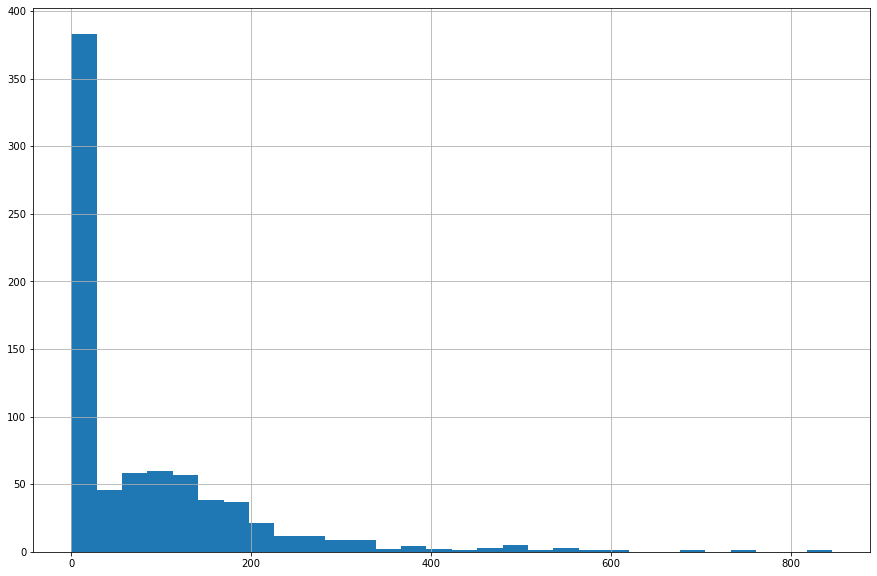

In [ ]:
X['test'].hist(bins = 30,
               figsize=(15, 10))

This chart shows, there are many people with 0 blood sugar which is impossible in medical perspective. After talking with medical staff, they told us when they didn't have any data, they put 0.

We also do the same process for skin:

In [ ]:
X['skin'].hist(bins = 30,
               figsize=(15, 10))

###### **Handle Null by method: AVERAGE**

We consider 0 as a null values and based on this assumption, we can handle null values.
The method we want to use is puttin the average of column instead of null values. However there are many techniques, but here we use this.

In [ ]:
test_avg = X[X['test'] != 0]['test'].mean()
skin_avg = X[X['skin'] != 0]['skin'].mean()

Now, we replace:

In [ ]:
X.replace({'test': 0}, test_avg, inplace=True)
X.replace({'skin': 0}, skin_avg, inplace=True)

Now, if we take a look at skin and test, we see we have no 0 values. However, this method is not a good method when we have many null values, because it increases kurtosis.

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

ax1.hist(X['test'], range=(10,50))
ax1.set(title='Vehicle MPG', xlabel='Combined MPG', ylabel='Number of Cars')

ax2.boxplot(X['skin'], labels=['All'], showfliers=False)
ax2.set(ylabel='MPG for vehicles')

fig.suptitle('MPG Distribution', fontsize=14, fontweight='bold');

###### **Handle Null by method: KNN**

Again, we reset data to run a new method for handling null values. This method is one of the most sophisticated methods which works based on the neighbours of a null values. If this algorithms finds any null values, based on the `K` neighbour, it puts the average of those numbers instead of the null.

First of all, we should replace the 0 with null values:

In [ ]:
X.replace({'test': 0, 'skin': 0},
             np.nan,
             inplace = True)

Now, we apply `KNN` method:

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3) # We put around 3 neighbours
X = imputer.fit_transform(X)

#### **Standardize (Scale) Numerical**

We also have to neutralize the importance of numbers in dataset among each column. There are many different methods for scaling to put all numerical values in a scale. In another project we used `Standard Scaler` and here we use `MinMax Scaler`. The process is the same but this method is a divide the difference of value and average by difference of Maximum and Minium values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) #We put in which range we want to have all data
X = scaler.fit_transform(X)
X

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X